In [ ]:
# This makes a block diagram from information in the FITS headers

In [1]:
## For a demo of how this notebook works, download the fake FITS files in the directory
## YOURUSERNAME@lbti-cdata:/mnt/iscsi/lmircam/L0/fake_fits
## to the directory /fake_fits/ within the directory this notebook is in.
## Then proceed through the following steps. Edit this notebook as you wish
## once you are ready to run it on your own data

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from astropy.io import fits
import pandas as pd
from datetime import datetime
#%matplotlib inline

In [3]:
# stem 

stem = ('.')

In [8]:
# read in subsidiary FITS header data files, then combine them
full_table1 = pd.read_csv('./data/00000_to_8000_meta_data_190419_fizeau_tests.csv')
full_table2 = pd.read_csv('./data/up_to_17000s_meta_data_190419_fizeau_tests.csv')
full_table3 = pd.read_csv('./data/up_to_25000s_meta_data_190419_fizeau_tests.csv')
full_table4 = pd.read_csv('./data/up_to_29000s_meta_data_190419_fizeau_tests.csv')
full_table5 = pd.read_csv('./data/up_to_end_meta_data_190419_fizeau_tests.csv')

tables_list = [full_table1, full_table2, full_table3, full_table4, full_table5]

full_table = pd.concat(tables_list)

In [9]:
# sort table by frame number (a few are out of order)

full_table.sort_values(["FRAMENUM"], inplace=True)
full_table = full_table.reset_index(drop=True) # reset indices and don't keep the old ones

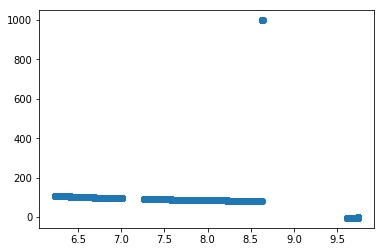

In [10]:
plt.scatter(full_table['LBT_UTC'],full_table['LBT_PARA'])
plt.show()

In [6]:
# print all keys

for i in range(0,200):
    print(full_table.keys()[i])

Unnamed: 0
AGE_STOP
BADROWS
BITPIX
CAPCOMP
COMMENT
COMTTEMP
CPTEMP
CTLRTEMP
DATAFLAG
DATE-OBS
DETECTOR
DETTEMP
DIMMFLUX
EXPMODE
EXPTIME
EXTEND
FILENAME
FILTPOLE
FLAG
FPCAZM
FPCAZS
FPCELM
FPCELS
FPCPISTM
FPCPISTS
FRAME
FRAMENUM
GAIN
IL_HORIZ
INSTRUME
ITIME
LBTTEMP
LBT_AIRM
LBT_ALT
LBT_AZ
LBT_DEC
LBT_LST
LBT_LXOS
LBT_LYOS
LBT_PARA
LBT_RA
LBT_RXOS
LBT_RYOS
LBT_UTC
LCMODES
LGAIN
LLOOPON
LMIR_FW1
LMIR_FW2
LMIR_FW3
LMIR_FW4
LMRHTPOW
LMRHTSET
LMRHTVAL
LM_APWHL
LM_FW25
LM_MAGWL
LOFFSETX
LOFFSETY
LOFFSETZ
LOPTTEMP
LSLNULL
LSTATUS
LTTMODUL
LWBCTEMP
LWCCDBIN
LWCCDFRQ
LWIND1S
NAXIS
NAXIS1
NAXIS2
NAXIS3
NCBMDVT
NCOADDS
NDROPS
NGROUPS
NIC_NAC
NIL_NDFW
NIL_OPW
NIL_PRW
NLDCRC
NLMGTLT
NLNCNC
NLPPLTLT
NLWNTRNS
NMCMSLD
NODPOS
NOUTPUTS
NRAMPS
NREADS
NRESETS
OBJNAME
PCB1X
PCB1Y
PCBRAD
PCCLOSED
PCFJMPS
PCJD
PCLAMB1
PCLAMB2
PCLOOPHZ
PCMSNR1
PCMSNR2
PCPHMCS1
PCPHMCS2
PCPHMEN1
PCPHMEN2
PCPHMSN1
PCPHMSN2
PCPHSTD1
PCPHSTD2
PCPLDG
PCPLIG
PCPLPG
PCPLSP01
PCPLSP1
PCSSPER
PCTIPSP
PCTLTSP
PID
PIL_VERT
RAMPTIM
RCMODES

IndexError: index 148 is out of bounds for axis 0 with size 148

In [6]:
len(full_table)

3000

In [9]:
# print stuff to screen

for t in range(0,8000):
    print('FRAMENUM: '+str(full_table['FRAMENUM'][t])+
          #'| FW1: '+str(full_table['LMIR_FW1'][t])+
          #'| FW3: '+str(full_table['LMIR_FW3'][t])+
          '| ITIME: '+str(full_table['ITIME'][t])+
          #'| FW3: '+str(full_table['LMIR_FW3'][t])+
          '| LBT_UTC: '+str(full_table['LBT_UTC'][t])+
          #'| PA: '+str(full_table['LBT_PARA'][t]))
          '| PCCLOSED: '+str(full_table['PCCLOSED'][t]))

FRAMENUM: 9800| ITIME: 206.025| LBT_UTC: 11.11507| PCCLOSED: 0.0
FRAMENUM: 9801| ITIME: 206.025| LBT_UTC: 11.115210000000001| PCCLOSED: 0.0
FRAMENUM: 9802| ITIME: 206.025| LBT_UTC: 11.11548| PCCLOSED: 0.0
FRAMENUM: 9803| ITIME: 206.025| LBT_UTC: 11.11562| PCCLOSED: 0.0
FRAMENUM: 9804| ITIME: 206.025| LBT_UTC: 11.11576| PCCLOSED: 0.0
FRAMENUM: 9805| ITIME: 206.025| LBT_UTC: 11.1159| PCCLOSED: 0.0
FRAMENUM: 9806| ITIME: 206.025| LBT_UTC: 11.11604| PCCLOSED: 0.0
FRAMENUM: 9807| ITIME: 206.025| LBT_UTC: 11.11618| PCCLOSED: 0.0
FRAMENUM: 9808| ITIME: 206.025| LBT_UTC: 11.11632| PCCLOSED: 0.0
FRAMENUM: 9809| ITIME: 206.025| LBT_UTC: 11.1166| PCCLOSED: 0.0
FRAMENUM: 9810| ITIME: 206.025| LBT_UTC: 11.11674| PCCLOSED: 0.0
FRAMENUM: 9811| ITIME: 206.025| LBT_UTC: 11.11688| PCCLOSED: 0.0
FRAMENUM: 9812| ITIME: 206.025| LBT_UTC: 11.11701| PCCLOSED: 0.0
FRAMENUM: 9813| ITIME: 206.025| LBT_UTC: 11.11715| PCCLOSED: 0.0
FRAMENUM: 9814| ITIME: 206.025| LBT_UTC: 11.117289999999999| PCCLOSED: 0.0
FRAMENU

KeyError: 1028

In [11]:
# print non-redundant parameters to color-code in the meta-data plot

print("LMIR_FW1")
print(full_table['LMIR_FW1'].drop_duplicates())
print("--------------------------------")
print("LMIR_FW2")
print(full_table['LMIR_FW2'].drop_duplicates())
print("--------------------------------")
print("LMIR_FW2.5")
print(full_table['LM_FW25'].drop_duplicates())
print("--------------------------------")
print("LMIR_FW3")
print(full_table['LMIR_FW3'].drop_duplicates())
print("--------------------------------")
print("LMIR_FW4")
print(full_table['LMIR_FW4'].drop_duplicates())
print("--------------------------------")
print("PCCLOSED")
print(full_table['PCCLOSED'].drop_duplicates())
print("--------------------------------")
print("ITIME")
print(full_table['ITIME'].drop_duplicates())
print("--------------------------------")

LMIR_FW1
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10                NaN
11                NaN
12                NaN
13                NaN
14                NaN
15                NaN
16                NaN
17                NaN
18                NaN
19                NaN
20                NaN
21                NaN
22                NaN
23                NaN
24                NaN
25                NaN
26                NaN
27                NaN
28                NaN
29                NaN
             ...     
27973             NaN
27974             NaN
27975             NaN
27976             NaN
27977             NaN
27978             NaN
27979             NaN
27980             NaN
27981             NaN
27982             NaN
27983             NaN
27984             NaN
27985             NaN
27986             NaN
2

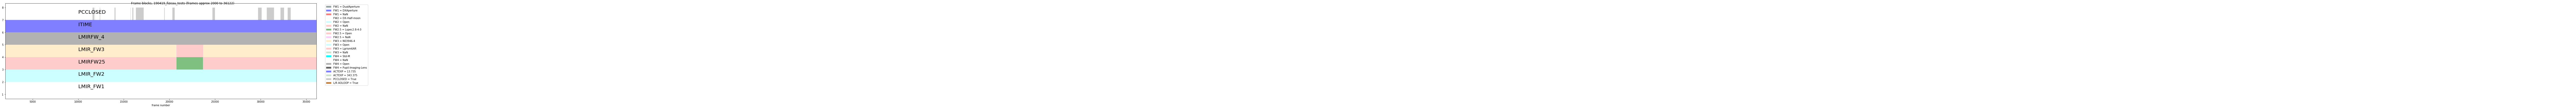

In [16]:
############################################################
# Infomertial: make plot of relevant quantities for classifying the blocks of frames:
# 1. 2 filters
# 2. 3 targets
# 3. 2 nod positions

fig, ax = plt.subplots()
fig.set_size_inches(20,6)

x_pos_of_labels = 10000

# LMIR FW1
ax.fill_between(full_table["FRAMENUM"], 1, 2, where=full_table["LMIR_FW1"]=="DualAperture", \
                facecolor='darkslategray', label='FW1 = DualAperture', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 1, 2, where=full_table["LMIR_FW1"]=="DXAperture", \
                facecolor='blue', label='FW1 = DXAperture', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 1, 2, where=full_table["LMIR_FW1"]=="NaN", \
                facecolor='red', label='FW1 = NaN', alpha=0.5)
ax.annotate('LMIR_FW1', xy=(x_pos_of_labels, 1.5), size=20, xycoords='data')


# LMIR FW2
#ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="SX-Half-moon", \
#                facecolor='orange', label='FW2 = SX-Half-moon', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="DX-Half-moon", \
                facecolor='honeydew', label='FW2 = DX-Half-moon', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="Open", \
                facecolor='aqua', label='FW2 = Open', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="NaN", \
                facecolor='red', label='FW2 = NaN', alpha=0.2)
#ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="ND2.0-T1", \
#                facecolor='blue', label='FW2 = ND2.0-T1', alpha=0.2)
#ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="ND1.0-T10", \
#                facecolor='maroon', label='FW2 = ND1.0-T10', alpha=0.2)
ax.annotate('LMIR_FW2', xy=(x_pos_of_labels, 2.5), size=20, xycoords='data')


# LMIR FW2.5
ax.fill_between(full_table["FRAMENUM"], 3, 4, where=full_table["LM_FW25"]=="Lspec2.8-4.0", \
                facecolor='green', label='FW2.5 = Lspec2.8-4.0', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 3, 4, where=full_table["LM_FW25"]=="Open", \
                facecolor='red', label='FW2.5 = Open', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 3, 4, where=full_table["LM_FW25"]=="NaN", \
                facecolor='magenta', label='FW2.5 = NaN', alpha=0.2)
ax.annotate('LMIRFW25', xy=(x_pos_of_labels, 3.5), size=20, xycoords='data')


# LMIR FW3
ax.fill_between(full_table["FRAMENUM"], 4, 5, where=full_table["LMIR_FW3"]=="N03946-4", \
                facecolor='orange', label='FW3 = N03946-4', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 4, 5, where=full_table["LMIR_FW3"]=="Open", \
                facecolor='cyan', label='FW3 = Open', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 4, 5, where=full_table["LMIR_FW3"]=="Lgrism6AR", \
                facecolor='red', label='FW3 = Lgrism6AR', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 4, 5, where=full_table["LMIR_FW3"]=="NaN", \
                facecolor='green', label='FW3 = NaN', alpha=0.2)
ax.annotate('LMIR_FW3', xy=(x_pos_of_labels, 4.5), size=20, xycoords='data')


# LMIR FW4
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Std-M", \
                facecolor='cyan', label='FW4 = Std-M', alpha=1)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="NaN", \
                facecolor='white', label='FW4 = NaN', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Open", \
                facecolor='grey', label='FW4 = Open', alpha=0.6)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Pupil-Imaging-Lens", \
                facecolor='black', label='FW4 = Pupil-Imaging-Lens', alpha=0.6)
ax.annotate('LMIRFW_4', xy=(x_pos_of_labels, 5.5), size=20, xycoords='data')


# Integration time
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==13.735, \
                facecolor='b', label='ACTEXP = 13.735', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==343.375, \
                facecolor='g', label='ACTEXP = 343.375', alpha=0.2)
'''
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==521.6750, \
                facecolor='magenta', label='ACTEXP = 521.6750', alpha=1)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==109.8260, \
                facecolor='cyan', label='ACTEXP = 109.8260', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==27.4566, \
                facecolor='yellow', label='ACTEXP = 27.4566', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ITIME"]==508.1950, \
                facecolor='darkgreen', label='ACTEXP = 508.1950', alpha=1)
'''
ax.annotate('ITIME', xy=(x_pos_of_labels, 6.5), size=20, xycoords='data')


# Phase controlled
ax.fill_between(full_table["FRAMENUM"], 7, 8, where=full_table["PCCLOSED"]==1, \
                facecolor='black', label='PCCLOSED = True', alpha=0.2)
ax.annotate('PCCLOSED', xy=(x_pos_of_labels, 7.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(full_table["FRAMENUM"], 8, 9, where=full_table["LLOOPON"]==1, \
                facecolor='peru', label='L/R AOLOOP = True', alpha=1)
ax.annotate('LLOOPON', xy=(x_pos_of_labels, 8.5), size=20, xycoords='data')

# DX AO loop
ax.fill_between(full_table["FRAMENUM"], 9, 10, where=full_table["RLOOPON"]==1, \
                facecolor='peru', alpha=1)
ax.annotate('RLOOPON', xy=(x_pos_of_labels, 9.5), size=20, xycoords='data')

# test
'''
ax.fill_between(full_table["FRAMENUM"], 10, 11, where=full_table["RWCCDBIN"]==1, \
                facecolor='peru', alpha=1)
#ax.annotate('RLOOPON', xy=(4500, 9.5), size=20, xycoords='data')
'''

# target
'''
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="ac her", facecolor='orange', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="AC Her", facecolor='orange', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="hd 167275", facecolor='purple', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="HD167275", facecolor='purple', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="HD166842", facecolor='yellow', alpha=0.5)
ax.fill_between(full_table["framenum"], 3, 4, where=full_table["ITIME"]==0.029252, facecolor='green', alpha=0.5)
ax.fill_between(full_table["framenum"], 3, 4, where=full_table["ITIME"]==0.058504, facecolor='grey', alpha=0.5)
'''

ax.legend(loc='upper right', bbox_to_anchor=(1.17, 1))

plt.xlim([2000,36122])
plt.suptitle("Frame blocks, 190419_fizeau_tests (frames approx 2000 to 36122)")
plt.xlabel("frame number")
plt.tight_layout()
#plt.axvline(x=6302) # for checking
plt.savefig("junk.pdf", bbox_inches='tight')
#plt.show()